In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib # type: ignore

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Preprocessing

In [3]:
# Dimensionality of the dataset(rows,columns)
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
#Check no.of data of a particular area
df['area_type'].value_counts() 

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

## Handling missing values

In [7]:
# Check no. of missing data for each columns
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Here , we can see that there are five columns which has missing values that include balcony,price,location,size,society  columns.

In [8]:
# Since 'society' column has large number of missing values, so we drop the column
df.drop(['society'], axis=1, inplace=True)
df.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [9]:
df.shape

(13320, 8)

In [10]:
# Drop all rows with null values
df2 = df.dropna()
df2.shape

(12710, 8)

In [11]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Data preprocessing

In [12]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

Here in 'size' column there are two types of values, so we need to make it one type.

In [13]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

C:\Users\jhalo\AppData\Local\Temp\ipykernel_9884\4049590364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

We see that there are houses with 23 and 43 bedroos that is not possible. 

In [14]:
# Check data having more than 20 bedrooms
df2[df2.bhk > 20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


A 43 bhk in 2400sqft and 27bhk in 8000sqft doesnt look feasible. So, these 2 rows might be errors. So we remove these rows.



---
Lets explore total_sqft column.


In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There are some value '1133 - 1384', which is a range rather than a particular numeric value. Lets check, if there are any more such inconsistancies in values.

In [16]:
# We create a function for finding inconsistancies in total_sqft
def sqft_value(x):
  try:
    float(x)
  except:
    return False
  return True

# The above function will return rows with a single numeric value in total_sqft

In [17]:
# But we need values that are inconsistant, so, use negation sign (~) and apply function
df2[~df2.total_sqft.apply(sqft_value)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [18]:
# Define a function to perform the above mentioned job.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
      return None

In [19]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [20]:
df3.total_sqft.isnull().sum()

np.int64(42)

In [21]:
df3 = df3[df3.total_sqft.notnull()]
df3.total_sqft.isnull().sum()

np.int64(0)

In [22]:
# Average of 2100 and 2850 is 2475
df3.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
bhk                                4
Name: 30, dtype: object

In [23]:
#Now add a new feature called price per square feet
df4 = df3.copy()
df4['price_per_sqft'] = (df4['price']*100000) / df4['total_sqft']
df4.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556


In [24]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                                         514
Sarjapur  Road                                     372
Electronic City                                    302
Kanakpura Road                                     259
Thanisandra                                        233
                                                  ... 
12th cross srinivas nagar banshankari 3rd stage      1
Tilak Nagar                                          1
Pattegarhpalya                                       1
Sarvobhogam Nagar                                    1
Prasanna layout Herohalli                            1
Name: count, Length: 1248, dtype: int64

In [25]:
location_stats.values.sum()

np.int64(12668)

In [26]:
# Locations with more than 10 rows
len(location_stats[location_stats>10])

235

In [27]:
# Total number of locations
len(location_stats)

1248

In [28]:
# Locations with less than 10 rows
len(location_stats[location_stats<=10])

1013

**Dimensionality Reduction**

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. 

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
HAL 2nd Stage                                      10
Basapura                                           10
Gunjur Palya                                       10
Naganathapura                                      10
Thyagaraja Nagar                                   10
                                                   ..
12th cross srinivas nagar banshankari 3rd stage     1
Tilak Nagar                                         1
Pattegarhpalya                                      1
Sarvobhogam Nagar                                   1
Prasanna layout Herohalli                           1
Name: count, Length: 1013, dtype: int64

In [30]:
len(df4.location.unique())

1248

In [31]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

236

In [32]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


## Outlier Removal 

Normally square ft per bedroom is 300 i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [33]:
df4[df4.total_sqft/df4.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [34]:
df4.shape

(12668, 10)

In [35]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12013, 10)

In [36]:
df5.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 170000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [37]:
# function for removing outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df6 = remove_pps_outliers(df5)
df6.shape

(9852, 10)

## Plotting

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    

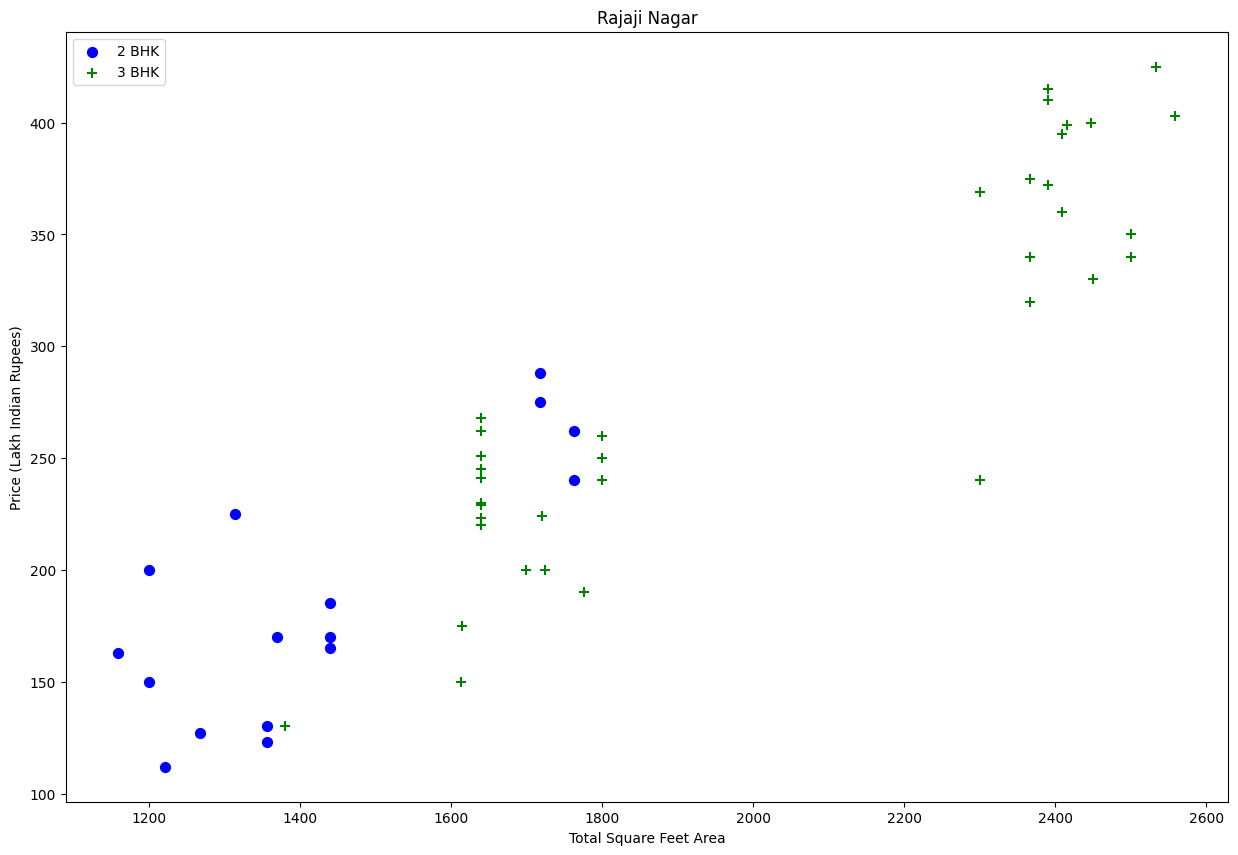

In [39]:
# for Rajai nagar
plot_scatter_chart(df6,"Rajaji Nagar")

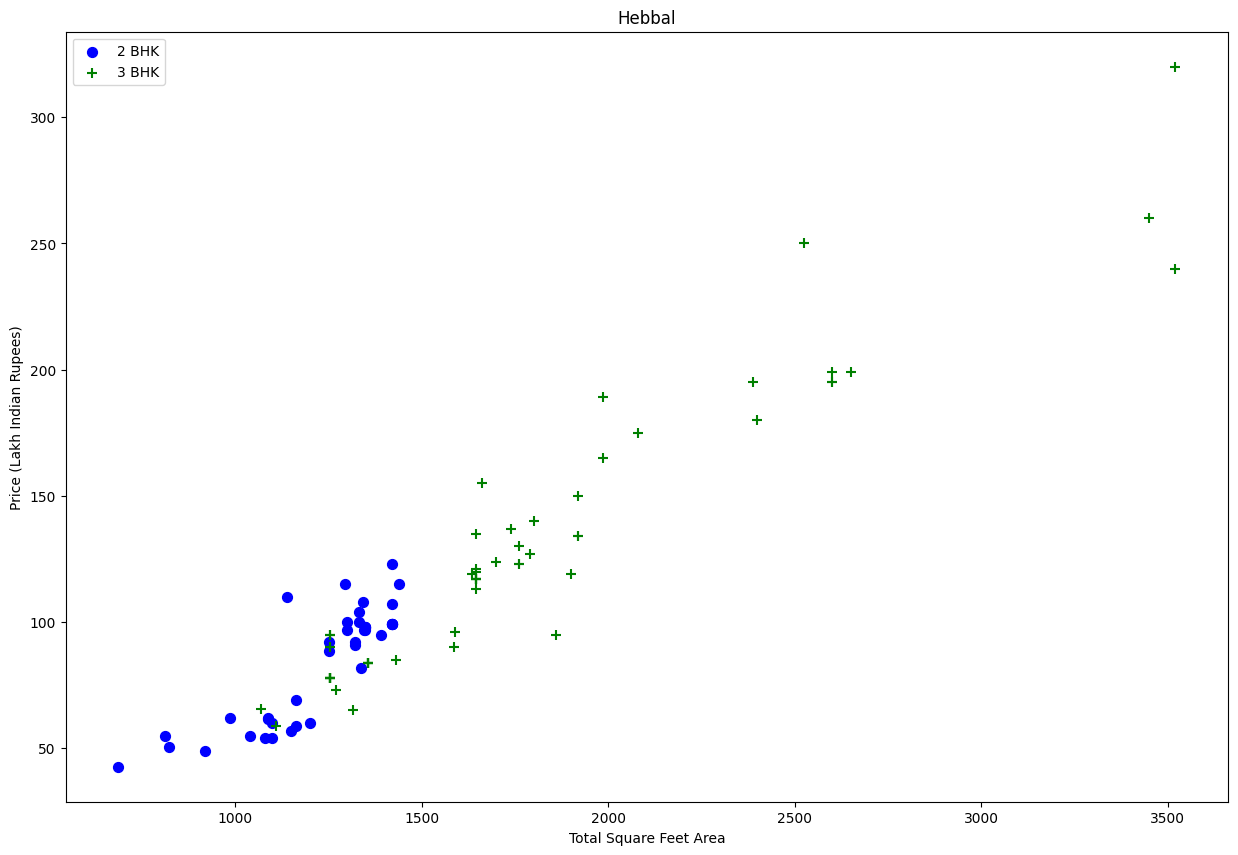

In [40]:
# for hebbal
plot_scatter_chart(df6,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). So for a given location, build a dictionary of stats per bhk, i.e.
{ '1':{'mean': 4000,'std: 2000,'count': 34} , '2':{'mean': 4300,'std: 2300,'count': 22} }

Now remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [42]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7014, 10)

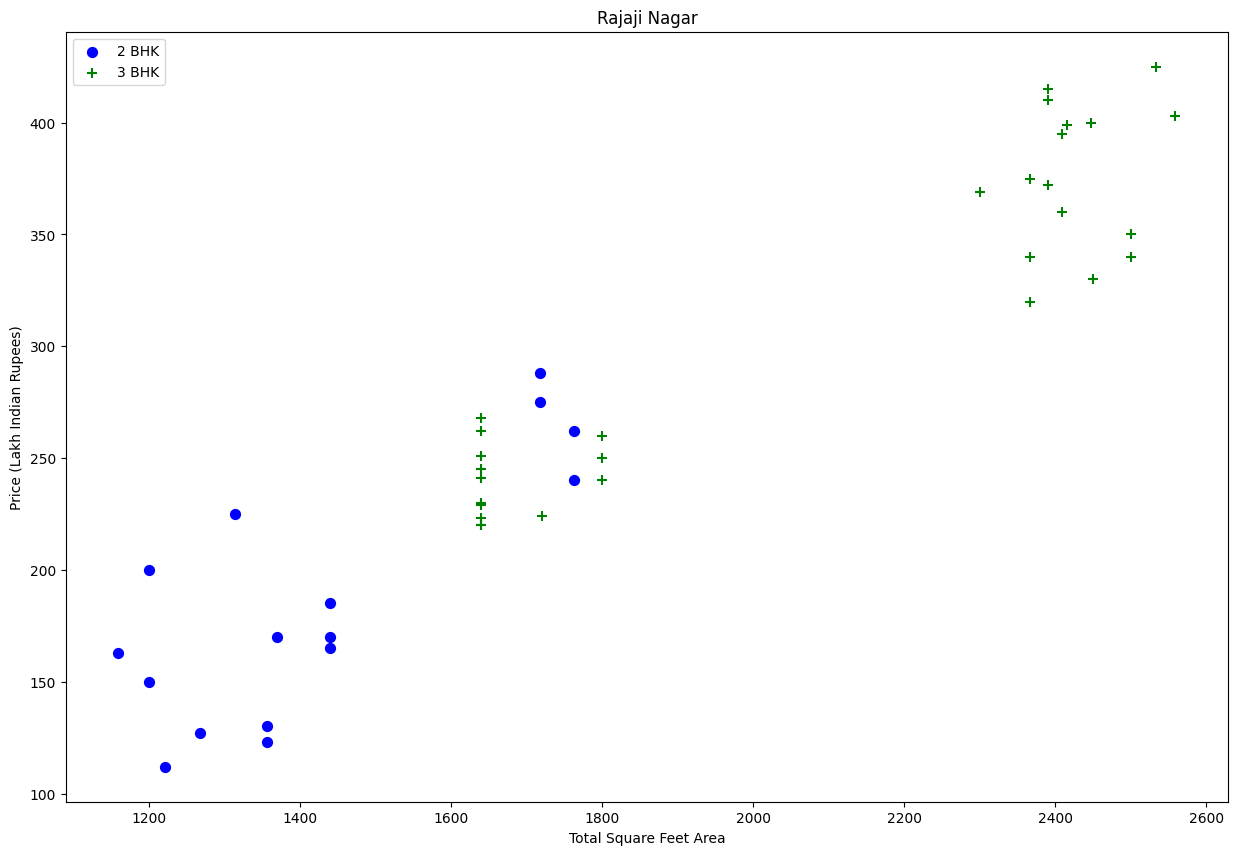

In [43]:
# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

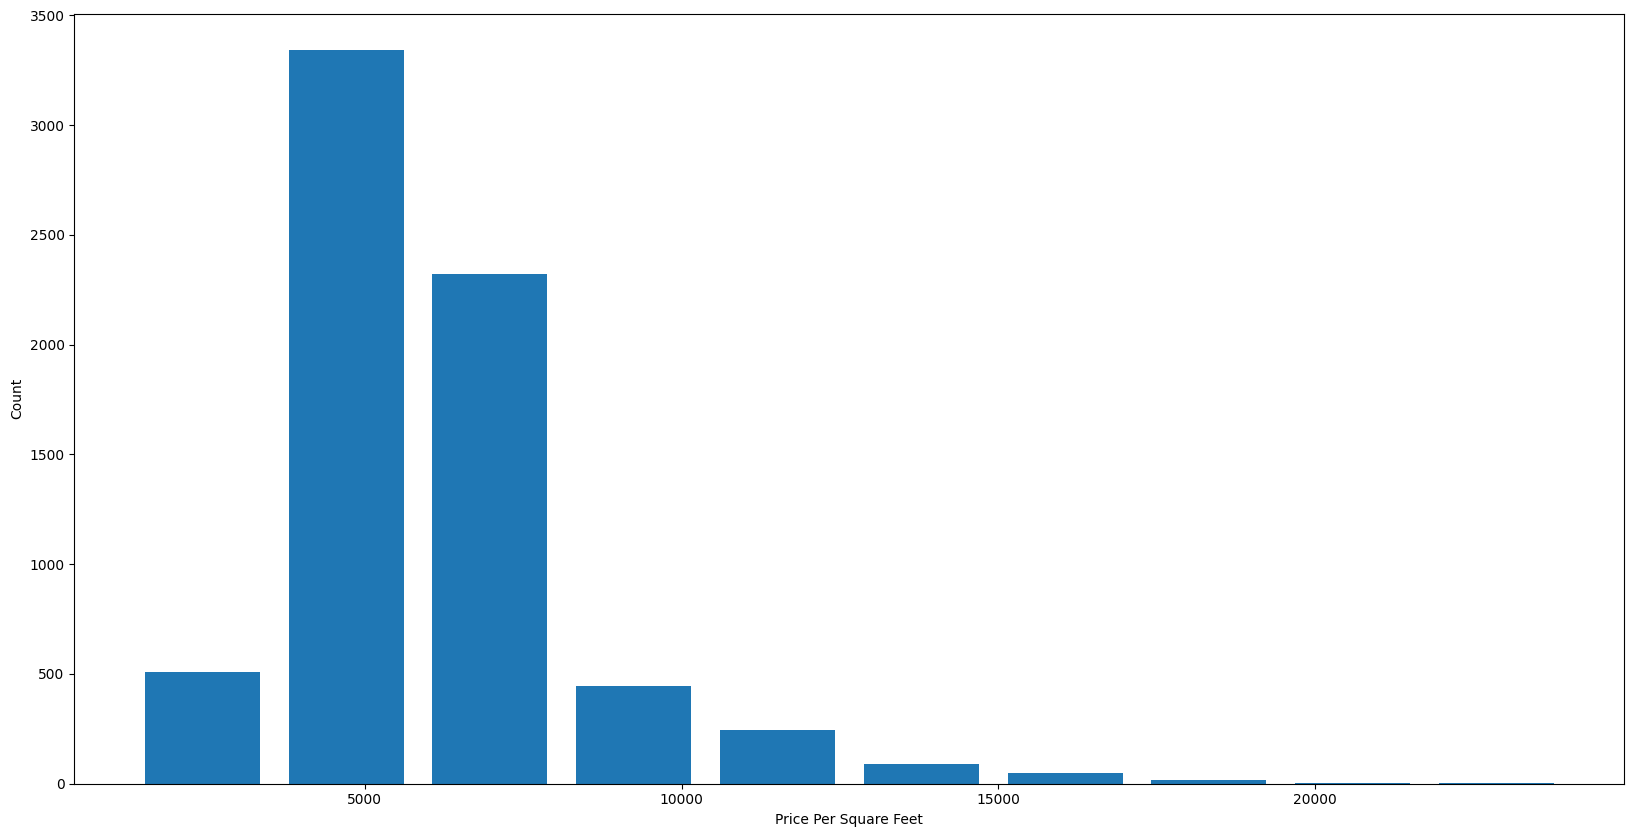

In [44]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
df7.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

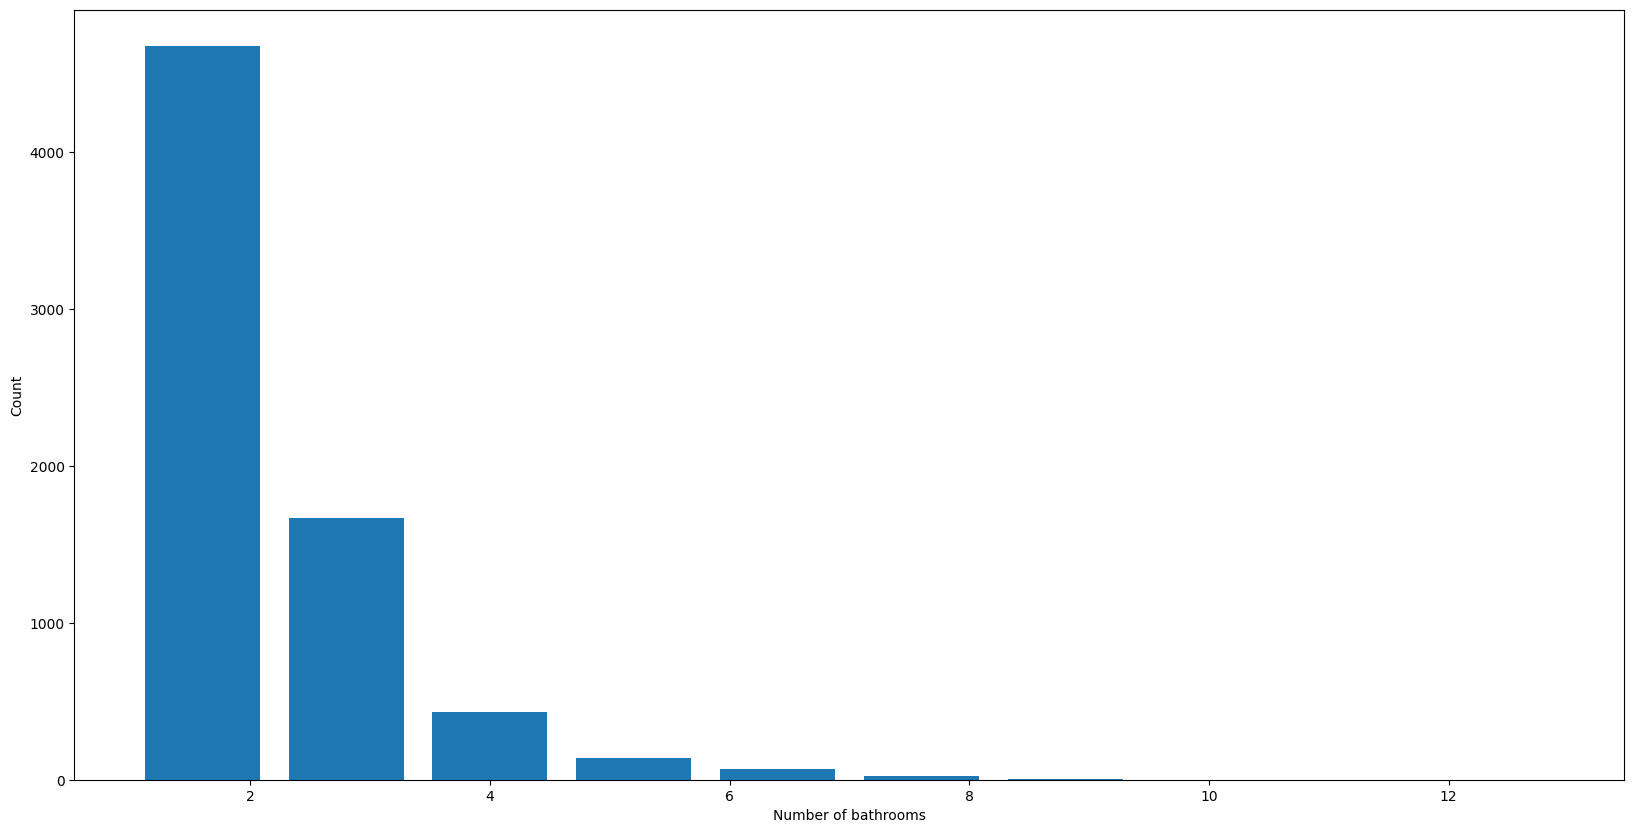

In [46]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
# Some houses have 13 bathrooms
df7[df7.bath>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


If you have, say, 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error.

In [48]:
df7[df7.bath>df7.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,Super built-up Area,Ready To Move,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [49]:
df7.shape

(7014, 10)

In [50]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(6947, 10)

In [51]:
df9 = df8.drop(['area_type', 'availability', 'balcony', 'size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


#  One Hot Encoding 

We can see that the columns location contains text data. When we are building the models, it is difficult for the models to process text data and is confortable with numeric data. Therefore we use the method of encoding, specifically one hot encoding to convert the text data to numeric data.

In [52]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
# Columns created during one-hot encoding represent unique locations
locations = df10.columns[len(df9.columns) - 1:].tolist()  
print(locations)


['bhk', '1st Block Jayanagar', '1st Phase JP Nagar', '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar', 'Balagere', 'Banashankari', 'Banashankari Stage II', 'Banashankari Stage III', 'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli', 'Bommasandra', 'Bommasandra Industrial Area', 'Bommenahalli', 'Brookefield', 'Budigere', 'CV Raman Nagar', 'Chamrajpet', 'Chan

In [56]:
df11.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=239)

# Model Building


In [57]:
df11.shape

(6947, 239)

In [58]:
X = df11.drop(['price'],axis='columns') 
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
X.shape

(6947, 238)

In [60]:
y = df11.price #Target
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [61]:
# Train test split
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
# # DecisiontreeRegression 
# from sklearn.tree import DecisionTreeRegressor # type: ignore
# dt = DecisionTreeRegressor()
# dt.fit(X_train,y_train)
# # Accuracy:71%
# y_pred = dt.predict(X_test) # Predict test set
# print("Accuracy: {:.1f}%".format(dt.score(X_test, y_test) * 100))

In [63]:
# from sklearn.ensemble import RandomForestRegressor # type: ignore
# rf = RandomForestRegressor()
# rf.fit(X_train,y_train)
# # Accuracy: 82%
# y_pred = rf.predict(X_test) 
# print("Accuracy: {:.1f}%".format(rf.score(X_test, y_test) * 100))

In [64]:
from sklearn.linear_model import LinearRegression # type: ignore
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = lr_clf.predict(X_test) # Predict test set
print("Accuracy: {:.1f}%".format(lr_clf.score(X_test, y_test) * 100))

Accuracy: 85.9%


In [66]:
# Create a pickle file.
import pickle
pickle.dump(lr_clf, open('model.pkl', 'wb'))

## Testing model

Create a function which takes input variables and predicts price as output.

In [67]:
# Function to predict price when input (independent variables) are provided
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [68]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\jhalo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(91.64521372280578)

In [69]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\jhalo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(91.35094134413552)

In [70]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\jhalo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(152.22103006370472)